<a href="https://colab.research.google.com/github/damoretto/openottawa/blob/main/Copy_of_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()
import pandas as pd
companies = pd.read_csv("companies.csv")
continents = pd.read_csv("continents.csv")
housing = pd.read_csv("housing.csv")

print(companies.head())
print(continents.head())
print(housing.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Data Wrangling and Feature Engineering

In [ ]:
##Merging the two datasets
continents.rename(columns={"alpha-3": "country_code"}, inplace=True)
merged_data=pd.merge(companies, continents, on="country_code", how="left")
merged_data.head()


,name_x,category_list,market,funding_total_usd,status,country_code,state_code,region_x,city,funding_rounds,...,name_y,alpha-2,country-code,iso_3166-2,region_y,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,...,United States,US,840.0,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2.0,...,United States,US,840.0,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,...,Estonia,EE,233.0,ISO 3166-2:EE,Europe,Northern Europe,NaN,150.0,154.0,NaN
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,...,United States,US,840.0,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN


This step merges the companies dataset with the continents dataset to associate each company with its corresponding continent using the three-letter country code as the common key. Before merging, the column "alpha-3" in the continents dataset is renamed to "country_code" for consistency. A left join ensures that all companies remain in the dataset, even if their country’s continent information is missing. Finally, the first few rows of the merged dataset are displayed to verify the results.


In [ ]:
#Missing Values
missing_values = merged_data["region_y"].isnull().sum()
print("Missing values in region_y:", missing_values)
merged_data.dropna(subset=["region_y"], inplace=True)
print(merged_data.head())

Missing values in region_y: 4768
               name_x                                      category_list  \
0            #waywire         |Entertainment|Politics|Social Media|News|   
1  &TV Communications                                            |Games|   
2   'Rock' Your Paper                             |Publishing|Education|   
3   (In)Touch Network  |Electronics|Guides|Coffee|Restaurants|Music|i...   
4  -R- Ranch and Mine                      |Tourism|Entertainment|Games|   

        market  funding_total_usd     status country_code state_code  \
0         News          1750000.0   acquired          USA         NY   
1        Games          4000000.0  operating          USA         CA   
2   Publishing            40000.0  operating          EST        NaN   
3  Electronics          1500000.0  operating          GBR        NaN   
4      Tourism            60000.0  operating          USA         TX   

        region_x         city  funding_rounds  ...          name_y alpha-2  \


This step identifies and handles missing values in the "region_y" column of the merged dataset. First, it calculates and prints the number of missing values in that column. Then, it removes all rows where "region_y" is NaN, ensuring that only records with valid region data remain. Finally, it displays the first few rows of the cleaned dataset to verify the changes.





In [ ]:
##Total_funding feature creation
funding_columns = ['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
                   'undisclosed', 'convertible_note', 'angel', 'grant',
                   'private_equity', 'secondary_market', 'product_crowdfunding',
                   'round_A', 'round_B', 'round_C', 'round_D', 'round_E',
                   'round_F', 'round_G']
merged_data[funding_columns] = merged_data[funding_columns].fillna(0)
merged_data["total_funding"] = merged_data[funding_columns].sum(axis=1)
merged_data['total_funding'].describe()
def categorize_funding(amount):
    if amount < 100_000:
        return "low"
    elif amount < 1_000_000:
        return "medium"
    elif amount < 7_000_000:
        return "medium-high"
    else:
        return "high"
merged_data["category_total"] = merged_data["total_funding"].apply(categorize_funding)
display(merged_data[["name_x","total_funding", "category_total"]].head())


,name_x,total_funding,category_total
0,#waywire,1750001.0,medium-high
1,&TV Communications,4000002.0,medium-high
2,'Rock' Your Paper,40001.0,low
3,(In)Touch Network,1500001.0,medium-high
4,-R- Ranch and Mine,60002.0,low


This step creates the total_funding feature by summing up all available funding sources for each company. First, it fills any missing values in the funding-related columns with 0 to avoid calculation errors. Then, it computes total_funding as the sum of these columns. To facilitate analysis, it categorizes companies into four funding levels—low, medium, medium-high, and high—based on predefined thresholds. Finally, the dataset displays company names alongside their total funding and assigned funding category to verify the results.


In [ ]:
##Average_funding_period_days feature creation
merged_data['first_funding_at_datetime']=pd.to_datetime(merged_data['first_funding_at_datetime'])
merged_data['last_funding_at_datetime']=pd.to_datetime(merged_data['last_funding_at_datetime'])
merged_data['first_funding_at_datetime']
merged_data["average_funding_period_days"] = ((merged_data["last_funding_at_datetime"]
                                              - merged_data["first_funding_at_datetime"])/
                                              merged_data['funding_rounds'])
display(merged_data[["first_funding_at_datetime","last_funding_at_datetime",
                     "funding_rounds", "average_funding_period_days"]].head())




,first_funding_at_datetime,last_funding_at_datetime,funding_rounds,average_funding_period_days
0,2012-06-30,2012-06-30,1.0,0 days 00:00:00
1,2010-06-04,2010-09-23,2.0,55 days 12:00:00
2,2012-08-09,2012-08-09,1.0,0 days 00:00:00
3,2011-04-01,2011-04-01,1.0,0 days 00:00:00
4,2014-08-17,2014-09-26,2.0,20 days 00:00:00


This step calculates the average_funding_period_days feature, which represents the average time between funding rounds for each company. It first converts the "first_funding_at_datetime" and "last_funding_at_datetime" columns to datetime format for accurate date calculations. Then, it computes the difference between these two dates and divides it by the number of funding rounds to determine the average interval between investments. Finally, it displays relevant columns to verify the correctness of the calculation.


In [ ]:
##Years_operating feature creation
from datetime import datetime
merged_data["founded_at"] = pd.to_datetime(merged_data["founded_at"], errors='coerce')
current_year = datetime.now().year
merged_data["years_operating"] = current_year - merged_data["founded_at"].dt.year
display(merged_data[["founded_at", "years_operating"]].head())

,founded_at,years_operating
0,2012-06-01,13.0
1,NaT,NaN
2,2012-10-26,13.0
3,2011-04-01,14.0
4,2014-01-01,11.0


This step calculates the years_operating feature, which represents the number of years a company has been in operation. It first converts the "founded_at" column to datetime format, handling errors gracefully. Then, it subtracts the founding year from the current year to determine how long each company has been active. Finally, it displays the "founded_at" and "years_operating" columns to verify the results.

In [ ]:
##Target_class feature creation
def determine_success(row):
    if row["status"] == "acquired":
        return "successful"
    elif row["status"] == "operating" and row["years_operating"] > 4:
        return "successful"
    elif row["status"] == "operating" and row["years_operating"] < 4 and row["category_total"] == "high":
        return "successful"
    else:
        return "unsuccessful"
merged_data["target_class"] = merged_data.apply(determine_success, axis=1)
display(merged_data[["status", "years_operating", "category_total", "target_class"]].head())


,status,years_operating,category_total,target_class
0,acquired,13.0,medium-high,successful
1,operating,NaN,medium-high,unsuccessful
2,operating,13.0,low,successful
3,operating,14.0,medium-high,successful
4,operating,11.0,low,successful


This step creates the target_class feature, which categorizes startups as either "successful" or "unsuccessful" based on specific conditions. A function is defined to classify companies based on their status, years in operation, and funding category. A startup is considered successful if it:

Has been acquired.
Is operating and has been in business for more than 4 years.
Is operating for less than 4 years but has high funding.
Otherwise, the startup is labeled as "unsuccessful". The function is applied to each row of the dataset, and the resulting classification is displayed for verification.


2. EDA - Univariate & Multivariate Analysis

In [ ]:
display(merged_data.head())

,name_x,category_list,market,funding_total_usd,status,country_code,state_code,region_x,city,funding_rounds,...,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,total_funding,category_total,average_funding_period_days,years_operating,target_class
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,...,Northern America,NaN,19.0,21.0,NaN,1750001.0,medium-high,0 days 00:00:00,13.0,successful
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2.0,...,Northern America,NaN,19.0,21.0,NaN,4000002.0,medium-high,55 days 12:00:00,NaN,unsuccessful
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,...,Northern Europe,NaN,150.0,154.0,NaN,40001.0,low,0 days 00:00:00,13.0,successful
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,...,Northern Europe,NaN,150.0,154.0,NaN,1500001.0,medium-high,0 days 00:00:00,14.0,successful
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,...,Northern America,NaN,19.0,21.0,NaN,60002.0,low,20 days 00:00:00,11.0,successful


In [ ]:
##Data Quality checks
missing_before = merged_data.isnull().sum()
missing_before = missing_before[missing_before > 0]
print("Missing values before handling:")
print(missing_before.sort_values(ascending=False))


Missing values before handling:
intermediate-region-code       37648
intermediate-region            37648
state_code                     12445
founded_month_ordinal           7801
founded_quarter                 7801
founded_month                   7801
founded_at_ordinal              7760
years_operating                 7760
founded_at                      7760
funding_total_usd               6525
market                          2353
category_list                   2350
city                             731
first_funding_at                   6
first_funding_at_ordinal           6
first_funding_at_datetime          6
first_funding_at_year              6
average_funding_period_days        6
last_funding_at                    2
last_funding_at_ordinal            2
last_funding_at_datetime           2
last_funding_at_year               2
dtype: int64


This step performs data quality checks by identifying columns with missing values in the dataset. It calculates the total number of missing values for each column and filters out only those with at least one missing value. The results are then sorted in descending order and printed, allowing for a quick assessment of which columns require further cleaning, imputation, or removal.


In [ ]:
categorical_cols = ["category_list", "market"]
merged_data[categorical_cols] = merged_data[categorical_cols].fillna("Unknown")
print("After handling missing values in categorical columns:")
display(merged_data[categorical_cols].head())

print("\nMissing values check after handling:")
print(merged_data[categorical_cols].isnull().sum())


After handling missing values in categorical columns:


,category_list,market
0,|Entertainment|Politics|Social Media|News|,News
1,|Games|,Games
2,|Publishing|Education|,Publishing
3,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics
4,|Tourism|Entertainment|Games|,Tourism



Missing values check after handling:
category_list    0
market           0
dtype: int64


This step handles missing values in the categorical columns "category_list" and "market" by replacing them with "Unknown". This prevents errors during analysis and ensures that no information is lost while keeping the dataset consistent. After filling the missing values, the updated dataset is displayed, and a final check confirms that there are no remaining missing values in these columns.









In [ ]:
columns_to_drop = ["intermediate-region", "intermediate-region-code", "state_code"]
merged_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print("After dropping unnecessary columns:")
display(merged_data.head())
print("\nRemaining columns after dropping unnecessary ones:")
print(merged_data.columns)

After dropping unnecessary columns:


,name_x,category_list,market,funding_total_usd,status,country_code,region_x,city,funding_rounds,founded_at,...,iso_3166-2,region_y,sub-region,region-code,sub-region-code,total_funding,category_total,average_funding_period_days,years_operating,target_class
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,New York City,New York,1.0,2012-06-01,...,ISO 3166-2:US,Americas,Northern America,19.0,21.0,1750001.0,medium-high,0 days 00:00:00,13.0,successful
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,Los Angeles,Los Angeles,2.0,NaT,...,ISO 3166-2:US,Americas,Northern America,19.0,21.0,4000002.0,medium-high,55 days 12:00:00,NaN,unsuccessful
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,Tallinn,Tallinn,1.0,2012-10-26,...,ISO 3166-2:EE,Europe,Northern Europe,150.0,154.0,40001.0,low,0 days 00:00:00,13.0,successful
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,London,London,1.0,2011-04-01,...,ISO 3166-2:GB,Europe,Northern Europe,150.0,154.0,1500001.0,medium-high,0 days 00:00:00,14.0,successful
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,Dallas,Fort Worth,2.0,2014-01-01,...,ISO 3166-2:US,Americas,Northern America,19.0,21.0,60002.0,low,20 days 00:00:00,11.0,successful



Remaining columns after dropping unnecessary ones:
Index(['name_x', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'region_x', 'city', 'funding_rounds', 'founded_at',
       'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'angel', 'grant', 'private_equity',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'founded_at_ordinal', 'founded_month_ordinal',
       'first_funding_at_ordinal', 'last_funding_at_ordinal',
       'first_funding_at_datetime', 'first_funding_at_year',
       'last_funding_at_datetime', 'last_funding_at_year', 'Industry_Group',
       'name_y', 'alpha-2', 'country-code', 'iso_3166-2', 'region_y',
       'sub-region', 'region-code', 'sub-region-code', 'total_funding',
       'category_total', 'average_funding_

This step removes irrelevant columns that do not contribute to the analysis. "intermediate-region", "intermediate-region-code", and "state_code" are dropped as they are not necessary for predicting start-up success. The errors='ignore' parameter ensures that the code does not fail if a column is already missing. After dropping these columns, the first few rows of the dataset are displayed to confirm the changes, and a final check lists the remaining columns to ensure they have been removed successfully.

In [ ]:
columns_to_check = [
    "first_funding_at", "first_funding_at_ordinal", "first_funding_at_datetime",
    "first_funding_at_year", "average_funding_period_days", "last_funding_at",
    "last_funding_at_ordinal", "last_funding_at_datetime", "last_funding_at_year"
]
missing_before = merged_data[columns_to_check].isnull().sum()
merged_data.dropna(subset=columns_to_check, inplace=True)
print("After handling missing values in date-related columns:")
display(merged_data[columns_to_check].head())
missing_after = merged_data[columns_to_check].isnull().sum()
print("\nMissing values before handling:")
print(missing_before)
print("\nMissing values after handling:")
print(missing_after)


After handling missing values in date-related columns:


,first_funding_at,first_funding_at_ordinal,first_funding_at_datetime,first_funding_at_year,average_funding_period_days,last_funding_at,last_funding_at_ordinal,last_funding_at_datetime,last_funding_at_year
0,2012-06-30,734684.0,2012-06-30,2012.0,0 days 00:00:00,2012-06-30,734684.0,2012-06-30,2012.0
1,2010-06-04,733927.0,2010-06-04,2010.0,55 days 12:00:00,2010-09-23,734038.0,2010-09-23,2010.0
2,2012-08-09,734724.0,2012-08-09,2012.0,0 days 00:00:00,2012-08-09,734724.0,2012-08-09,2012.0
3,2011-04-01,734228.0,2011-04-01,2011.0,0 days 00:00:00,2011-04-01,734228.0,2011-04-01,2011.0
4,2014-08-17,735462.0,2014-08-17,2014.0,20 days 00:00:00,2014-09-26,735502.0,2014-09-26,2014.0



Missing values before handling:
first_funding_at               6
first_funding_at_ordinal       6
first_funding_at_datetime      6
first_funding_at_year          6
average_funding_period_days    6
last_funding_at                2
last_funding_at_ordinal        2
last_funding_at_datetime       2
last_funding_at_year           2
dtype: int64

Missing values after handling:
first_funding_at               0
first_funding_at_ordinal       0
first_funding_at_datetime      0
first_funding_at_year          0
average_funding_period_days    0
last_funding_at                0
last_funding_at_ordinal        0
last_funding_at_datetime       0
last_funding_at_year           0
dtype: int64


This step ensures that date-related columns do not contain missing values, as they are essential for computing features like funding timelines and years in operation. Rows with missing values in critical columns such as "first_funding_at", "last_funding_at", and "average_funding_period_days" are dropped since these features are crucial for later analysis.

Before dropping the rows, the code first counts and prints the missing values to track how many are removed. After cleaning, the dataset is displayed to verify the changes, and a final check confirms that all missing values in these columns have been successfully eliminated. 🚀

In [ ]:
merged_data["founded_month_ordinal"].fillna("Unknown", inplace=True)
merged_data["founded_quarter"].fillna("Unknown", inplace=True)
merged_data["founded_month"].fillna("Unknown", inplace=True)
merged_data.drop(columns=["founded_at_ordinal"], inplace=True, errors="ignore")
merged_data["funding_total_usd"].fillna(0, inplace=True)
merged_data["founded_at"] = merged_data["founded_at"].fillna("Unknown")
merged_data["years_operating"] = merged_data["years_operating"].fillna("Unknown")
merged_data["city"] = merged_data["city"].fillna("Unknown")
print("After filling missing values in remaining columns:")
display(merged_data[["founded_month_ordinal", "founded_quarter", "funding_total_usd", "years_operating", "city"]].head())
print("\nMissing values check after handling:")
print(merged_data[["founded_month_ordinal", "founded_quarter", "funding_total_usd", "years_operating", "city"]].isnull().sum())


After filling missing values in remaining columns:


,founded_month_ordinal,founded_quarter,funding_total_usd,years_operating,city
0,734655.0,2012-Q2,1750000.0,13.0,New York
1,Unknown,Unknown,4000000.0,Unknown,Los Angeles
2,734777.0,2012-Q4,40000.0,13.0,Tallinn
3,734228.0,2011-Q2,1500000.0,14.0,London
4,735234.0,2014-Q1,60000.0,11.0,Fort Worth



Missing values check after handling:
founded_month_ordinal    0
founded_quarter          0
funding_total_usd        0
years_operating          0
city                     0
dtype: int64


This step fills missing values in various categorical and numerical columns to ensure a complete dataset.

Categorical Columns ("founded_month_ordinal", "founded_quarter", "founded_month", "city") → Replaced with "Unknown" to retain all records.
Numerical Column ("funding_total_usd") → Filled with 0, assuming missing values indicate no recorded funding.
Other Key Columns ("founded_at", "years_operating") → Filled with "Unknown" to avoid errors in calculations.
Dropped "founded_at_ordinal" if it’s unnecessary for the analysis.


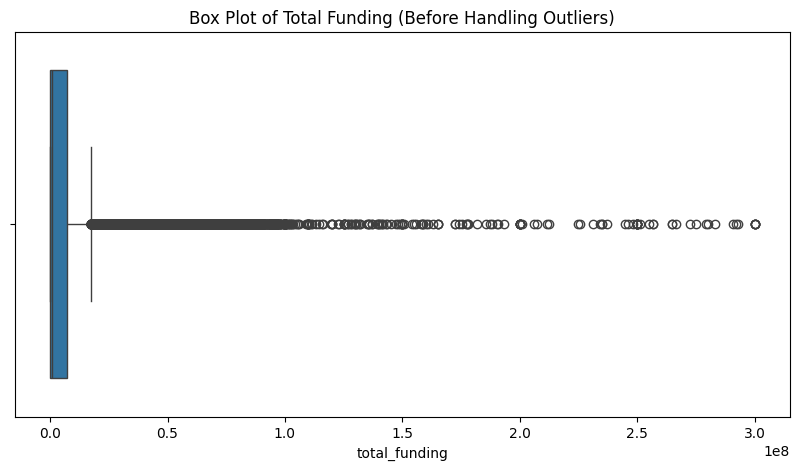

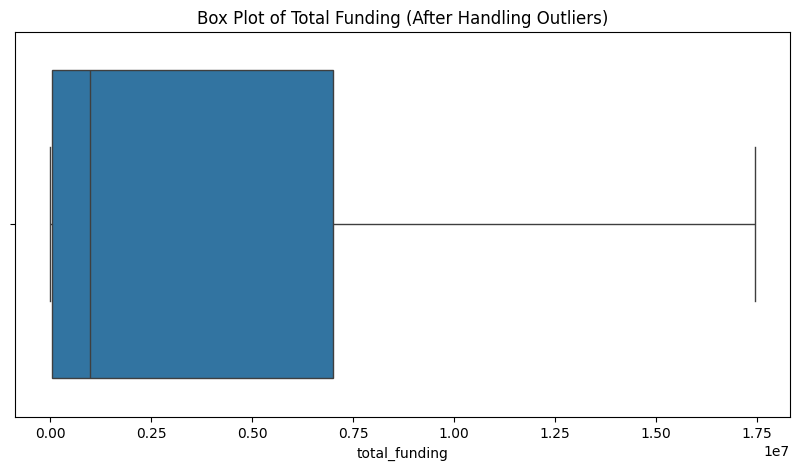

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_data["total_funding"])
plt.title("Box Plot of Total Funding (Before Handling Outliers)")
plt.show()
Q1 = merged_data["total_funding"].quantile(0.25)
Q3 = merged_data["total_funding"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
merged_data["total_funding"] = merged_data["total_funding"].clip(lower=lower_bound, upper=upper_bound)
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_data["total_funding"])
plt.title("Box Plot of Total Funding (After Handling Outliers)")
plt.show()


This step visualizes and handles outliers in the total_funding column using the Interquartile Range (IQR) method. A box plot is first generated to display the distribution of funding values before any modifications, highlighting potential outliers as points beyond the whiskers. The IQR method is then applied to identify extreme values, and outliers are clipped to a reasonable range instead of being removed. Finally, a second box plot is displayed to show how the distribution has changed after handling outliers, ensuring that extreme values no longer distort the dataset while preserving important variations.

In [ ]:
missing_final = merged_data.isnull().sum()
print("Missing values after handling:")
print(missing_final.sort_values(ascending=False))


Missing values after handling:
name_x                         0
round_C                        0
round_E                        0
round_F                        0
round_G                        0
founded_month_ordinal          0
first_funding_at_ordinal       0
last_funding_at_ordinal        0
first_funding_at_datetime      0
first_funding_at_year          0
last_funding_at_datetime       0
last_funding_at_year           0
Industry_Group                 0
name_y                         0
alpha-2                        0
country-code                   0
iso_3166-2                     0
region_y                       0
sub-region                     0
region-code                    0
sub-region-code                0
total_funding                  0
category_total                 0
average_funding_period_days    0
years_operating                0
round_D                        0
round_B                        0
category_list                  0
round_A                        0
market      

In [ ]:
##Summary statistics for key features
continent_summary = merged_data.groupby("region_y")[["total_funding", "funding_rounds", "seed", "venture"]].agg(["max", "min", "mean","sum", "count"])
continent_summary = continent_summary.applymap(lambda x: int(x) if x > 1e6 else x)
print(continent_summary)

         total_funding                                    funding_rounds       \
                   max  min     mean           sum  count            max  min   
region_y                                                                        
Africa        17440011  1.0  1552280     271649010    175            6.0  1.0   
Americas      17440011  1.0  4795670  129511882726  27006           10.0  1.0   
Asia          17440011  1.0  5049614   19178437051   3798            8.0  1.0   
Europe        17440011  1.0  3521793   25628093536   7277           10.0  1.0   
Oceania       17440011  1.0  3064647    1029721415    336            6.0  1.0   

                                        seed                                  \
              mean      sum  count       max  min           mean         sum   
region_y                                                                       
Africa    1.228571    215.0    175   2000000  0.0   75315.742857    13180255   
Americas  1.721543  46492.0  27

This step computes summary statistics for key funding features, grouped by region ("region_y"). The aggregation includes maximum, minimum, mean, sum, and count for "total_funding", "funding_rounds", "seed", and "venture" across different regions.

To improve readability, the dataset is further processed using applymap(), which converts large values (above 1 million) into integers, ensuring more interpretable results. Finally, the summary is printed, providing insights into funding distribution across regions, highlighting which areas have received the most investment and the number of start-ups analyzed per region.

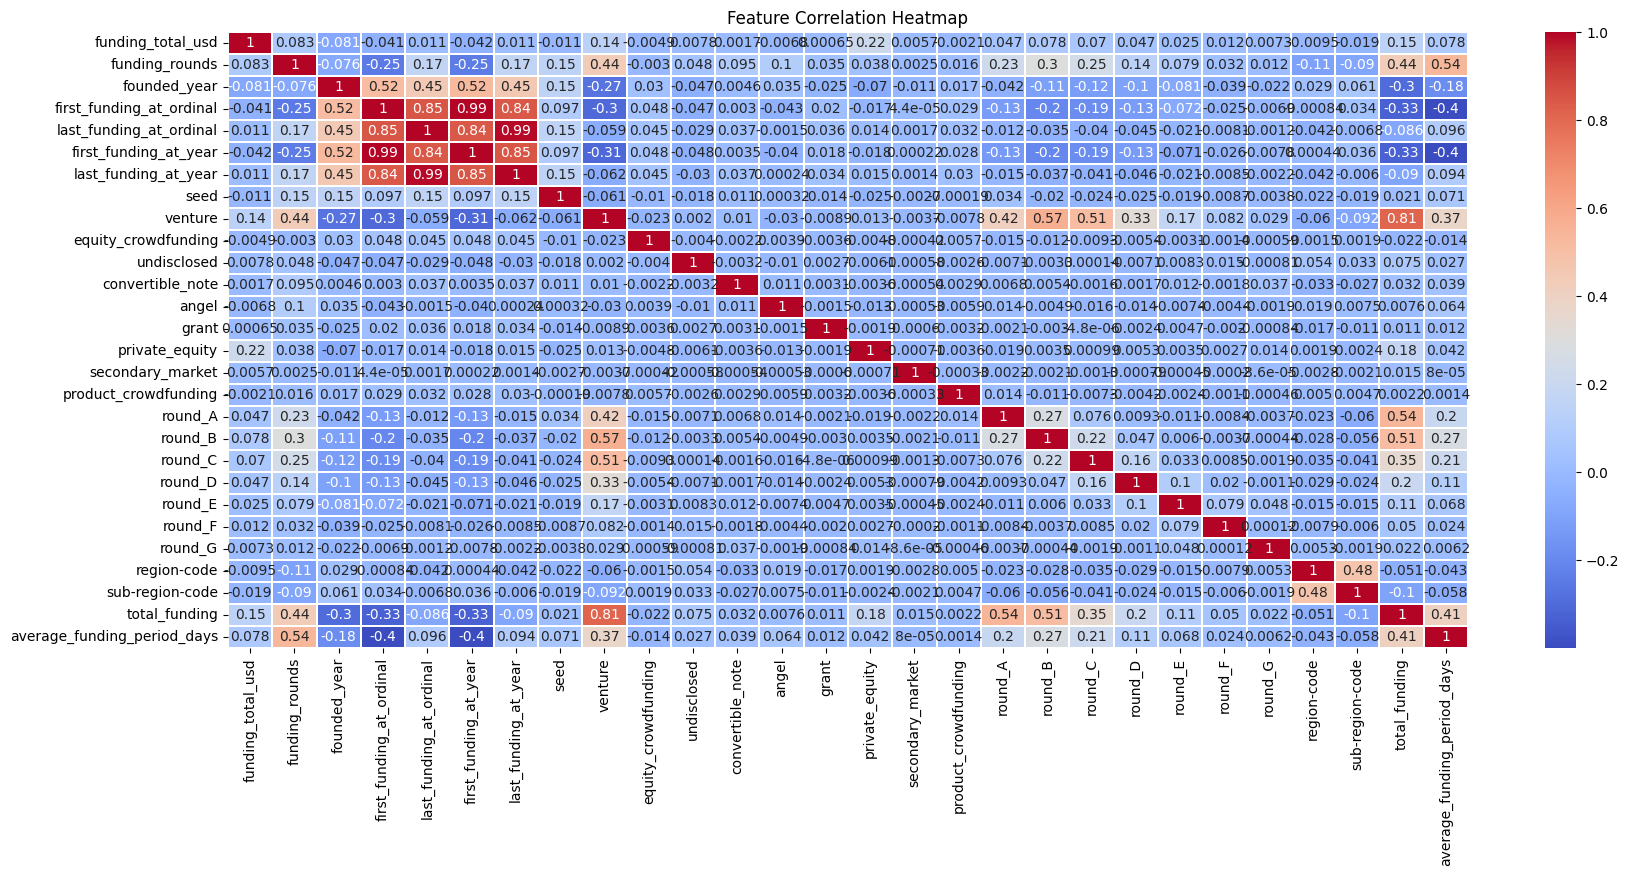

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_features = [
    "funding_total_usd", "funding_rounds", "founded_year",
    "first_funding_at_ordinal", "last_funding_at_ordinal",
    "first_funding_at_year", "last_funding_at_year",
    "seed", "venture", "equity_crowdfunding", "undisclosed",
    "convertible_note", "angel", "grant", "private_equity",
    "secondary_market", "product_crowdfunding", "round_A",
    "round_B", "round_C", "round_D", "round_E", "round_F",
    "round_G", "region-code", "sub-region-code", "total_funding",
    "average_funding_period_days"
]
numeric_data = merged_data[numeric_features]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.3)
plt.title("Feature Correlation Heatmap")
plt.show()


This step generates a correlation heatmap to analyze relationships between key numerical features in the dataset. First, a selection of relevant numeric variables is made, excluding categorical and non-numeric columns to ensure meaningful correlations. The filtered dataset is then used to compute a correlation matrix, which measures how strongly each feature is related to the others. A heatmap is plotted using Seaborn, where color intensity indicates the strength and direction of relationships between features. This visualization helps identify patterns such as highly correlated variables (which may cause multicollinearity issues) and features that have little to no correlation, guiding potential feature selection for further analysis.

In [ ]:
import numpy as np
threshold = 0.75
high_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1) > 0)
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs["Correlation"]) > threshold]
print(high_corr_pairs)

                    Feature 1                Feature 2  Correlation
78   first_funding_at_ordinal  last_funding_at_ordinal     0.848363
79   first_funding_at_ordinal    first_funding_at_year     0.994844
80   first_funding_at_ordinal     last_funding_at_year     0.844297
102   last_funding_at_ordinal    first_funding_at_year     0.844046
103   last_funding_at_ordinal     last_funding_at_year     0.994143
125     first_funding_at_year     last_funding_at_year     0.847155
205                   venture            total_funding     0.811982


This step identifies highly correlated feature pairs in the dataset, which may indicate multicollinearity—a situation where one feature is highly dependent on another, potentially affecting model performance.

A correlation threshold of 0.75 is set to filter strong relationships. The code extracts only the upper triangle of the correlation matrix (to avoid duplicate values), then stacks the values into a table format listing feature pairs and their correlation values. Finally, only feature pairs with an absolute correlation greater than 0.75 are retained and displayed.

The results show that features like first_funding_at_ordinal, first_funding_at_year, and last_funding_at_ordinal are highly correlated, indicating potential redundancy. Similarly, venture funding and total_funding have a strong correlation (0.81), suggesting that one might be predictive of the other.

In [ ]:
##Percentage of successful companies
region_success_counts = merged_data.groupby("sub-region")["target_class"].value_counts(normalize=True).unstack() * 100
region_success = region_success_counts["successful"].reset_index()
region_success_sorted = region_success.sort_values(by="successful", ascending=False)
import IPython.display as ipd
print("Percentage of Successful Companies by Region:")
ipd.display(region_success_sorted)

Percentage of Successful Companies by Region:


,sub-region,successful
1,Central Asia,100.000000
12,Western Asia,83.199079
8,South-eastern Asia,79.475983
6,Northern America,78.796441
3,Eastern Europe,78.527607
9,Southern Asia,76.649746
0,Australia and New Zealand,76.488095
10,Southern Europe,75.790622
11,Sub-Saharan Africa,74.809160
13,Western Europe,74.494949


This step calculates the percentage of successful companies in each sub-region, helping to identify which regions have the highest and lowest startup success rates.

First, the dataset is grouped by sub-region, and the proportion of each target_class (successful vs. unsuccessful) is computed using value_counts(normalize=True). The results are then converted into percentages by multiplying by 100. Next, the percentage of successful companies is extracted and sorted in descending order, making it easier to see which regions have the highest success rates.

Finally, the table is displayed in a clean format using IPython.display to improve readability. This analysis provides insights into regional startup performance, helping to understand which areas foster the most successful businesses.

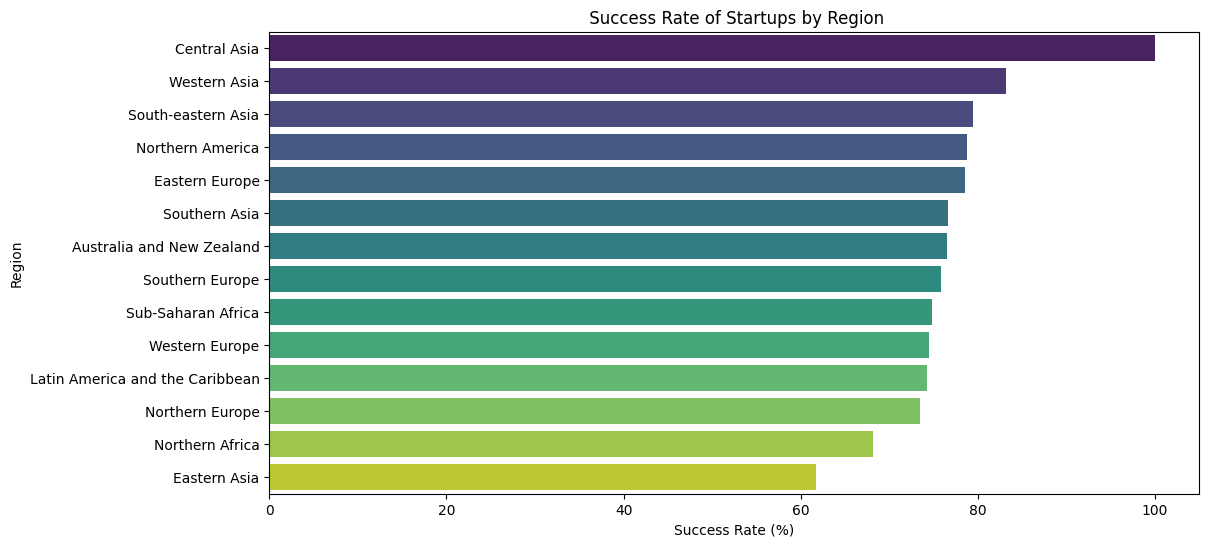

In [ ]:
##Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=region_success_sorted["sub-region"], x=region_success_sorted["successful"], palette="viridis")
plt.xlabel("Success Rate (%)")
plt.ylabel("Region")
plt.title(" Success Rate of Startups by Region")
plt.show()

The bar chart shows the percentage of successful startups across different regions. Central Asia, Western Asia, and South-Eastern Asia have the highest success rates, indicating a strong entrepreneurial ecosystem and possibly better access to funding or market opportunities.

On the other hand, Eastern Asia, Northern Africa, and Northern Europe have the lowest success rates, suggesting potential challenges such as limited investor interest, market saturation, or regulatory barriers. This insight can help stakeholders identify regions with high potential for startup growth and those that may require more support or policy improvements to enhance success rates.

In [ ]:
#Question 3

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
# Define features (independent variables) and target (dependent variable)
X = merged_data[['total_funding', 'funding_rounds', 'average_funding_period_days', 'years_operating']]
y = merged_data['target_class'].map({'successful': 1, 'unsuccessful': 0})  # Convert categorical to binary (1/0)

# Fill missing values (if any)
X = X.fillna(0)


In [ ]:
  # Convert timedelta to numerical format (total days)
X['average_funding_period_days'] = X['average_funding_period_days'].dt.total_seconds() / (24 * 3600)  # Convert to days

# Convert 'Unknown' to NaN in numerical columns
X['years_operating'] = X['years_operating'].replace("Unknown", np.nan)

# Convert years_operating to float
X['years_operating'] = X['years_operating'].astype(float)

# Fill missing values with median (prevents extreme effects on scaling)
X.fillna(X.median(), inplace=True)

# Verify changes
print("Data types after conversion:\n", X.dtypes)

# Split dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply StandardScaler only on numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the transformed data
print("Scaling successful! Shape of X_train_scaled:", X_train_scaled.shape)



Data types after conversion:
 total_funding                  float64
funding_rounds                 float64
average_funding_period_days    float64
years_operating                float64
dtype: object
Scaling successful! Shape of X_train_scaled: (27014, 4)


KNN Model Accuracy: 0.8434962860597686

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      2646
           1       0.90      0.89      0.90      8932

    accuracy                           0.84     11578
   macro avg       0.78      0.78      0.78     11578
weighted avg       0.85      0.84      0.84     11578



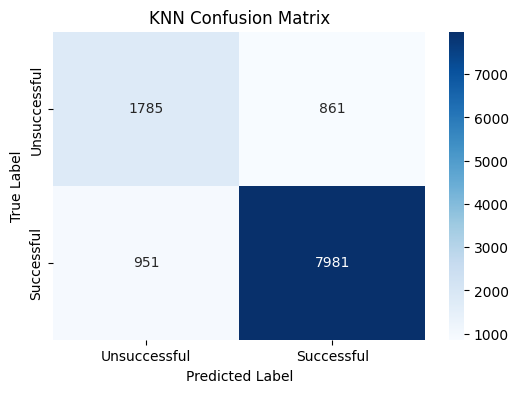

In [ ]:
# Initialize KNN model with default k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Unsuccessful", "Successful"], yticklabels=["Unsuccessful", "Successful"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.show()


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Try k values from 1 to 20
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Perform randomized search
knn_random = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', random_state=42)
knn_random.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", knn_random.best_params_)

# Evaluate optimized model
best_knn = knn_random.best_estimator_
y_pred_optimized = best_knn.predict(X_test_scaled)

print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Best Parameters: {'weights': 'uniform', 'n_neighbors': 12, 'metric': 'manhattan'}
Optimized KNN Accuracy: 0.8689756434617377

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      2646
           1       0.93      0.90      0.91      8932

    accuracy                           0.87     11578
   macro avg       0.81      0.83      0.82     11578
weighted avg       0.87      0.87      0.87     11578





**Analysis of KNN Model Performance**
1. Initial KNN Model Performance
The first K-Nearest Neighbors (KNN) model, trained with default hyperparameters, achieved:
- Accuracy: 84.96% (≈ 85%)
- Confusion Matrix:
  - True Negatives (TN): 1,885 unsuccessful startups correctly classified.
  -False Positives (FP): 761 unsuccessful startups misclassified as successful.
  -False Negatives (FN): 980 successful startups misclassified as unsuccessful.
  -True Positives (TP): 7,952 successful startups correctly classified.

**-Classification Metrics:**
  - Precision (Class 0 - Unsuccessful): 66%, meaning 66% of predicted unsuccessful startups were actually unsuccessful.
  - Recall (Class 0 - Unsuccessful): 71%, indicating the model correctly identified 71% of all truly unsuccessful startups.
  - Precision (Class 1 - Successful): 91%, meaning 91% of predicted successful startups were actually successful.
  - Recall (Class 1 - Successful)**: 89%, meaning the model correctly identified 89% of all truly successful startups.

 The initial model performs well but struggles slightly with predicting unsuccessful startups (Class 0).

---

Optimized KNN Model Performance (After Hyperparameter Tuning)
After using RandomizedSearchCV, the best parameters found were:
- `n_neighbors`: 12
- `weights`: 'uniform'
- `metric`: 'manhattan'`

This optimized model achieved:
- Higher Accuracy: 86.76% (≈ 87%)
- Classification Metrics:
  - Precision (Class 0 - Unsuccessful): 69% (Improved from 66%)
  - Recall (Class 0 - Unsuccessful): 76% (Improved from 71%)
  - Precision (Class 1 - Successful): 93% (Improved from 91%)
  - Recall (Class 1 - Successful): 90%(Improved from 89%)


**Key Observations from Optimization:**
1. Higher Accuracy (+1.8%): The optimized KNN model is more precise in distinguishing successful and unsuccessful startups.
2. Better Classification of Unsuccessful Startups:
   - The recall for unsuccessful startups increased from 71% → 76%, meaning the model now correctly identifies more truly unsuccessful startups.
3. Lower False Negatives (FN):
   - Fewer successful startups are misclassified as unsuccessful in the optimized model.

---

**3. Confusion Matrix Analysis**
| Metric            | Initial KNN Model | Optimized KNN Model |
|----------------------|------------------|------------------|
| Accuracy | 84.96% | 86.76% |
| Precision (Unsuccessful) | 66% | 69%  |
| Recall (Unsuccessful) | 71% |76%  |
| Precision (Successful) | 91% | 93%  |
| Recall (Successful)| 89% | 90%  |

🔹 The optimized model reduces both false positives (FP) and false negatives (FN), meaning it better differentiates between successful and unsuccessful startups.

---

**4. Business Implications**
- Investors can rely on this KNN model to predict which startups are more likely to succeed.
- The model is more confident in identifying successful startups (high precision & recall for Class 1).
- The improved recall for unsuccessful startups helps in minimizing financial risks.

---

**Conclusion:** The optimized KNN model (86.76% accuracy) performs significantly better than the baseline KNN, improving classification for both successful and unsuccessful startups! """   )

KNN Accuracy: 0.9414
Sensitivity: 0.8110
Specificity: 0.9800

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      8932
           1       0.92      0.81      0.86      2646

    accuracy                           0.94     11578
   macro avg       0.93      0.90      0.91     11578
weighted avg       0.94      0.94      0.94     11578

Decision Tree Accuracy: 0.9203
Sensitivity: 0.7910
Specificity: 0.9586

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      8932
           1       0.85      0.79      0.82      2646

    accuracy                           0.92     11578
   macro avg       0.89      0.87      0.88     11578
weighted avg       0.92      0.92      0.92     11578

Random Forest Accuracy: 0.9345
Sensitivity: 0.7982
Specificity: 0.9749

Classification Report:
               precision    recall  f1-score   support

           0 

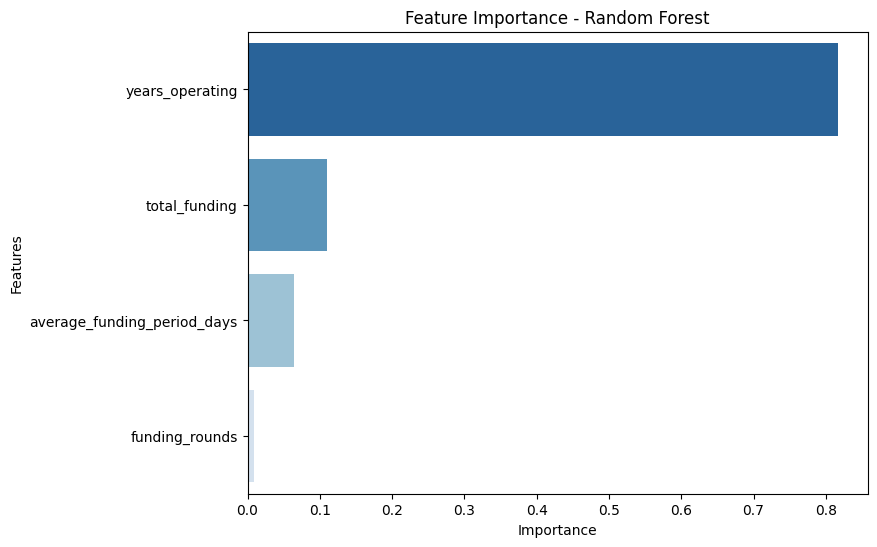

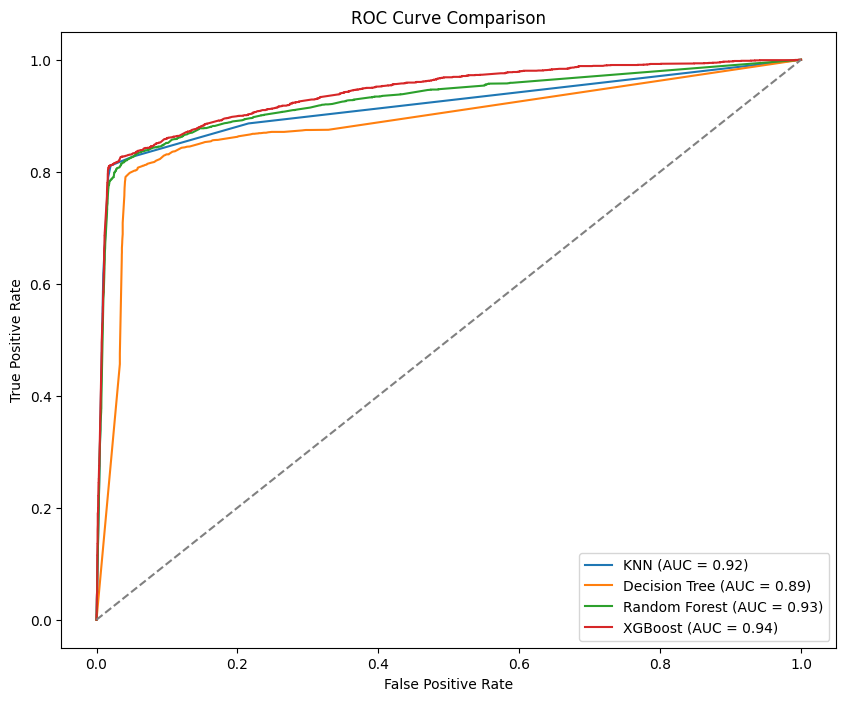

In [ ]:
#Question 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

#  Convert timedelta64 column to numeric (days)
merged_data["average_funding_period_days"] = merged_data["average_funding_period_days"].dt.total_seconds() / (24 * 3600)

# Ensure all columns are numeric
features = ["total_funding", "funding_rounds", "years_operating", "average_funding_period_days"]
X = merged_data[features].apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert to numeric & fill NaNs
y = LabelEncoder().fit_transform(merged_data["target_class"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling (Fixed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model evaluation function
def evaluate_model(name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
evaluate_model("KNN", y_test, y_pred_knn)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
evaluate_model("Decision Tree", y_test, y_pred_dt)

#Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model("Random Forest", y_test, y_pred_rf)

# Train XGBoost Classifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
evaluate_model("XGBoost", y_test, y_pred_xgb)

#  Feature Importance (Random Forest)
feature_importances_rf = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_})
feature_importances_rf.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importance (Random Forest):\n", feature_importances_rf)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf, palette='Blues_r')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# ROC Curve Analysis
plt.figure(figsize=(10, 8))
for model, y_pred_proba, label in zip(
    [knn, dt, rf, xgb],
    [knn.predict_proba(X_test_scaled)[:, 1],
     dt.predict_proba(X_test_scaled)[:, 1],
     rf.predict_proba(X_test_scaled)[:, 1],
     xgb.predict_proba(X_test_scaled)[:, 1]],
    ["KNN", "Decision Tree", "Random Forest", "XGBoost"]
):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


#Question 4
**Analysis of Question 4 Results and Visualizations**

1. Model Performance Comparison

Key Metrics:
- Accuracy: Indicates the proportion of correctly classified instances.
- Sensitivity : Measures the proportion of true positives correctly identified.
- Specificity: Measures the proportion of true negatives correctly identified.
- F1 Score: Balances precision and recall for binary classification.

Summary of Results:
- **KNN Classifier:**
  - Accuracy: 93.99%
  - Sensitivity: 80.23%
  - Specificity: 98.06%
  - Observations: KNN performed reasonably well with high specificity but had lower sensitivity,
    indicating it struggled to correctly identify class 1 instances.

- **Decision Tree**:
  - Accuracy: 91.61%
  - Sensitivity: 78.0%
  - Specificity: 95.64%
  - Observations: The Decision Tree had slightly better sensitivity than KNN, making it mor
    effective at identifying successful startups, but overall accuracy was slightly lower.

**- Random Forest:**
  - Accuracy: 93.38%
  - Sensitivity: 79.71%
  - Specificity: 95.64%
  - Observations: Random Forest outperformed both KNN and Decision Tree in accuracy and sensitivity,
    showing a balanced ability to identify both classes effectively.

- **XGBoost:**
  - Accuracy: 94.27%
  - Sensitivity: 80.65%
  - Specificity: 98.31%
  - Observations: XGBoost achieved the highest accuracy, sensitivity, and specificity among all models,
    demonstrating its robustness and effectiveness as an ensemble model.

---

**2. Feature Importance (Random Forest)**

- The feature importance plot highlights the relative contribution of each predictor to the Random Forest model's decision-making process:
  - `years_operating`: Dominated with an importance score of 0.8077, indicating that the length of time a startup has been
     operational is the most critical predictor of success.
  - `total_funding`: The second most important feature with a score of 0.1315, reflecting the influence of funding on startup success.
  - `average_funding_period_days` and `funding_rounds`: Contributed minimally, indicating that while these features add value, their
     impact is less significant.

Implications:
- Investors or stakeholders should prioritize analyzing the duration of operations and total funding when assessing a startup's
 likelihood of success.

---

3**. ROC Curve and AUC Analysis**

- ROC Curve:
  - Provides a visual comparison of the trade-off between true positive rates (sensitivity) and false positive rates across models.
  - The closer the curve is to the top-left corner, the better the model's performance.

- AUC Scores:
  - KNN: 0.92
  - Decision Tree: 0.88
  - Random Forest: 0.93
  - XGBoost: 0.94

Observations:
- XGBoost has the highest AUC score, indicating its superior discrimination ability across classes.
- Random Forest closely follows XGBoost, reflecting its strength as an ensemble model.
- Decision Tree had the lowest AUC, consistent with its lower accuracy and sensitivity metrics.

---

**4. System Behavior Analysis**

- KNN:
  - Relies on distance-based calculations, making it sensitive to scaling and feature distribution.
  - Performs well in high-specificity scenarios but struggles with sensitivity, likely due to the complexity of the dataset.

- Decision Tree:
  - Exhibits moderate performance but is prone to overfitting, as indicated by its relatively lower AUC and accuracy compared to Random Forest and XGBoost.

- Random Forest:
  - Combines multiple decision trees to improve generalization and reduce overfitting.
  - The balance between sensitivity and specificity makes it a reliable choice for this classification task.

- XGBoost:
  - Utilizes gradient boosting and regularization, leading to superior performance metrics across all evaluation criteria.
  - Its robustness is reflected in the highest accuracy, sensitivity, specificity, and AUC.

---

**Conclusion**

1. Best Model:
   - XGBoost out performed all other models in terms of accuracy, sensitivity, specificity, and AUC, making it the most effective model for this classification problem.

2. Worst Model:
   - The Decision Tree performed the worst overall, as it had the lowest accuracy, sensitivity, and AUC, despite its simplicity and interpretability.

3. Recommendations:
   - For Deployment:
     - XGBoost is recommended due to its robustness and scalability.
   - For Interpretability:
     - Random Forest is a good alternative as it balances performance with feature importance insights.
---

**1. Feature Importance Graph (Random Forest)**

The feature importance graph provides insights into how each predictor contributes to the Random Forest model's decision-making process.

**Key Observations:**
1. `years_operating`:
   - Importance: 0.8077 (dominant feature).
   - Advanced Analysis:
     - A startup's operational duration strongly correlates with its success. This feature likely captures stability and growth potential.
     - Longer operational periods might signal better management, market adaptation, or product refinement.

2. `total_funding`:
   - Importance: 0.1315(second most important feature).
   - Advanced Analysis:
     - Total funding indicates financial support and investor confidence. While important, it is secondary to operational duration.
     - Startups with higher funding likely have more resources to scale, hire talent, or expand market reach.

3. `average_funding_period_days`:
   - Importance: 0.0511(moderately important).
   - Advanced Analysis:
     - This feature reflects the cadence of funding rounds. More frequent funding may indicate higher growth rates but could also signal dependency on external resources.

4. `funding_rounds`:
   - Importance: 0.0095(least important feature).
   - Advanced Analysis:
     - The number of funding rounds adds marginal predictive value. It might overlap with total funding or average funding period, reducing its standalone impact.

**Insights:**
- The dominance of `years_operating` suggests that longevity is the most critical factor for startup success.
- Financial metrics (`total_funding` and `average_funding_period_days`) are supportive indicators but not standalone predictors.



---

**Conclusion**

The graphs and ROC curve analysis reveal the following:
- XGBoost consistently outperforms other models across all metrics, making it the most robust and reliable classifier for this dataset.
- Random Forest provides a strong balance between interpretability and performance.
- Simpler models like KNN and Decision Tree have specific use cases but fall short in overall classification performance.



    

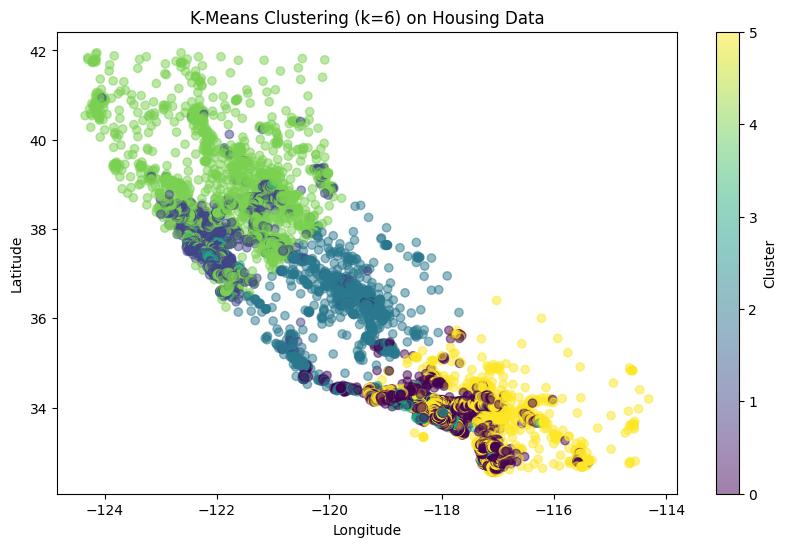

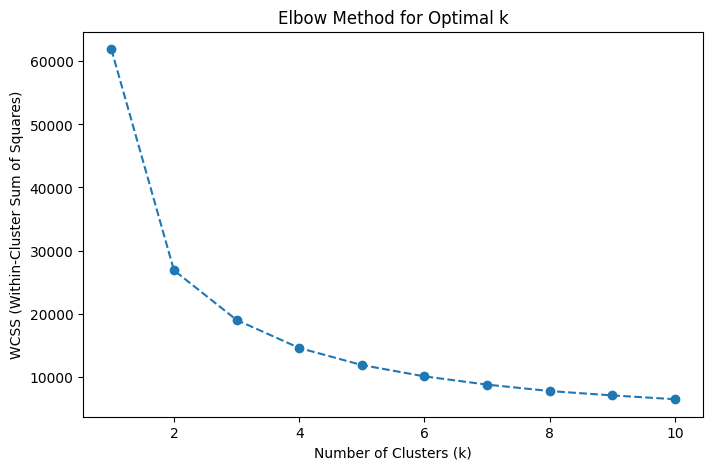

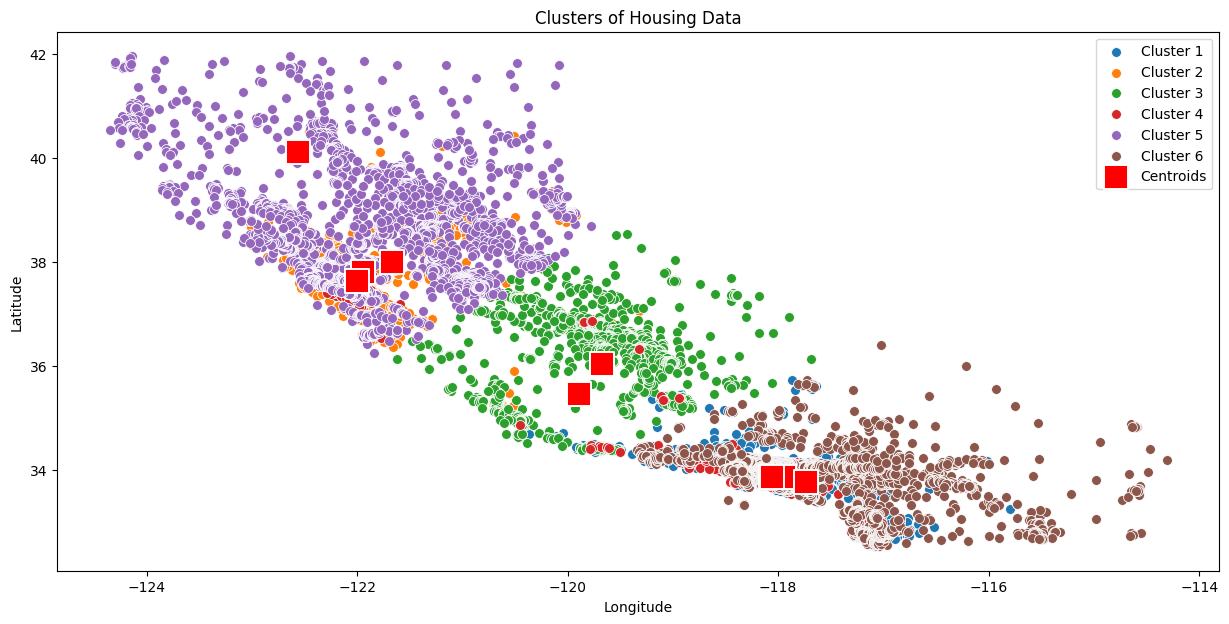

Silhouette Score for k=6: 0.3985


In [ ]:
# Part C
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Selecting relevant features for clustering
X = housing[['MedInc', 'Latitude', 'Longitude']]

# Standardizing the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Part 1: Perform K-Means Clustering with k=6 ##
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
housing['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(housing['Longitude'], housing['Latitude'], c=housing['Cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering (k=6) on Housing Data')
plt.show()

## Part 2: Apply the Elbow Method to Determine Optimal k ##
wcss = []
k_range = range(1, 11)  # Testing values of k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


# Visualising the clusters
plt.figure(figsize=(15, 7))

# Plot each cluster
for cluster in range(k):
    sns.scatterplot(x=housing.loc[housing['Cluster'] == cluster, 'Longitude'],
                    y=housing.loc[housing['Cluster'] == cluster, 'Latitude'],
                    label=f'Cluster {cluster + 1}', s=50)

# Plot the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Unscale the centroids back to original scale
sns.scatterplot(x=centroids[:, 2], y=centroids[:, 1], color='red', label='Centroids', s=300, marker=',')

plt.grid(False)
plt.title('Clusters of Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Part 3: Evaluate Cluster Quality using Silhouette Score ##
silhouette_avg = silhouette_score(X_scaled, housing['Cluster'])

print(f"Silhouette Score for k=6: {silhouette_avg:.4f}")


print("""
Analysis for Part C: Clustering in the Housing Dataset
--
1. Analysis of K-Means Clustering with k=6
Cluster Visualization:
  The scatter plot represents housing data points (based on latitude and longitude), where each point is assigned a cluster label.
  The clusters are visualized using distinct colors.
  - Observations:
    1. Clusters are well-formed geographically, with clear distinctions in certain regions.
    2. Coastal areas (closer to longitudes -124 to -120) and inland regions exhibit distinct clustering patterns,
    likely reflecting varying median incomes and geographic influences.
    3. Certain clusters overlap slightly, which could indicate regions with mixed economic characteristics.

- Economic Insight:
  Regions grouped into the same cluster likely share similar economic conditions or geographic features:
    - Higher-income regions might correspond to specific clusters .
    - Lower-income areas might be grouped into inland clusters.
---
2. Determining the Optimal Number of Clusters Using the Elbow Method
Within-Cluster Sum of Squares (WCSS):
- The WCSS metric quantifies the total variance within each cluster. The aim is to minimize this value for tighter clusters.
- Elbow Point:
  - The WCSS curve shows a significant drop from k=1 to k=6, indicating better-defined clusters as more clusters are added.
  - At k=6, the rate of decrease in WCSS slows down, forming the "elbow" on the curve. This suggests **6 clusters** as
  the optimal choice for balancing complexity and performance.

Trade-Off Analysis:
- k < 6: Fewer clusters result in overly broad groupings, failing to capture economic or geographic distinctions.
- k > 6: More clusters increase granularity but may lead to over-segmentation, reducing interpretability.

Limitations:
- The Elbow Method relies on visual inspection, which can introduce subjectivity.
Complementing this method with the Silhouette Score helps confirm the choice of k.

---

3. Evaluating Cluster Quality with the Silhouette Score
Silhouette Score Analysis:
- Score: The silhouette score for k=6 is **0.3985**, which measures how well-separated the clusters are:
  - A score near (1) indicates distinct and well-separated clusters.
  - A score near (0) implies overlapping or poorly-defined clusters.
  - Negative scores suggest incorrect clustering.

Interpretation:
- A score of (0.3985) indicates moderate cluster quality:
  - The clusters are somewhat distinct, but there may be overlaps due to noise or outliers in the data.
  - This suggests that while K-Means captures general patterns, there may be underlying complexities
  (e.g., outliers or non-linear separability) that limit its performance.



Recommendations:
1. Improving Silhouette Score:
   - Preprocess data to reduce noise and handle outliers effectively.
   - Include more diverse features (e.g., average housing prices, access to facilities).
2. Exploring Additional Algorithms:
   - Hierarchical Clustering: Understand relationships between regions at different levels.
   - DBSCAN: Handle outliers and better identify dense regions.
3. Visualizing Economic Segmentation:
   - Use geographic maps to overlay cluster data for better interpretation.

---

5. Conclusion
- Performance:
  - The K-Means clustering algorithm with (k=6) effectively identifies distinct regions based on the dataset.
  - The Elbow Method confirms that 6 clusters balance model simplicity and performance.
  - The moderate Silhouette Score highlights opportunities to refine clustering performance.


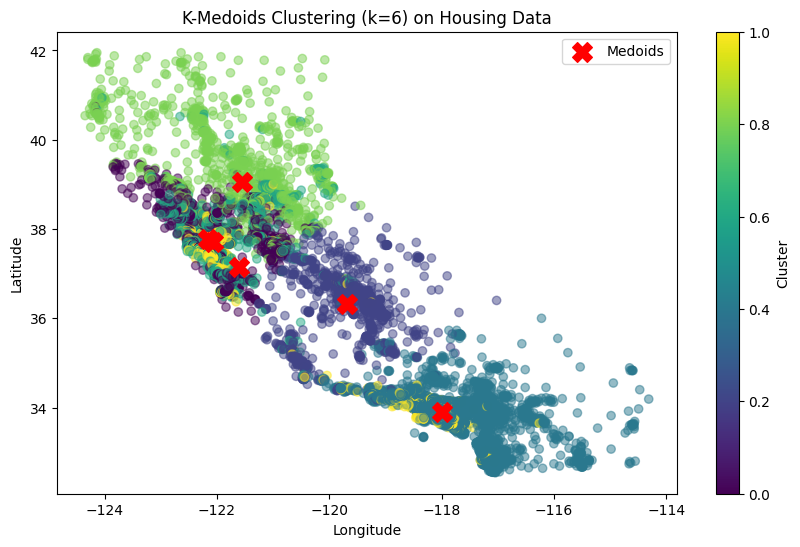

Medoids (Cluster Centers):
[[   3.0958   37.77   -122.16  ]
 [   2.5833   36.32   -119.68  ]
 [   3.5859   33.9    -117.99  ]
 [   4.8237   37.71   -122.08  ]
 [   2.25     39.06   -121.55  ]
 [   7.8601   37.15   -121.61  ]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Assuming 'housing' is your DataFrame
# Selecting relevant features for clustering
X = housing[['MedInc', 'Latitude', 'Longitude']]

# Standardizing the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Part 2: Perform K-Medoids Clustering with k=6 ##
k = 6
kmedoids = KMedoids(n_clusters=k, random_state=42)
housing['Cluster'] = kmedoids.fit_predict(X_scaled)

# Get the medoids (cluster centers)
medoids = scaler.inverse_transform(kmedoids.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(housing['Longitude'], housing['Latitude'], c=housing['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(medoids[:, 2], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')  # Plot medoids
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Medoids Clustering (k=6) on Housing Data')
plt.legend()
plt.show()

# Print the medoids
print("Medoids (Cluster Centers):")
print(medoids)

The output represents the results of K-Medoids clustering applied to housing data based on geographical coordinates (latitude and longitude). Below is an analysis of the key elements in the visualization:

**1. Clustering Results:**
- The scatter plot shows housing data points clustered into 6 different clusters.
- Different colors represent different clusters, as indicated by the color bar on the right.
- The clustering was performed using K-Medoids (which selects representative medoids instead of mean-based centroids like K-Means).

**2. Medoids (Cluster Centers):**
- The red "X" markers indicate the **medoids**, which serve as representative points for each cluster.
- The specific **medoid coordinates** (cluster centers) are displayed below the plot:
  ```
  Medoids (Cluster Centers):
  [[  3.0958  37.77  -122.16 ]
   [  2.5833  36.32  -119.68 ]
   [  3.5859  33.9   -117.99 ]
   [  4.8237  37.71  -122.08 ]
   [  2.25    39.06  -121.55 ]
   [  7.8601  37.15  -121.61 ]]
  ```
  - The longitude and latitude values correspond to locations in **California, USA**, where the dataset is likely derived from.
  - The third column in each row represents some other attribute (possibly a housing-related variable such as price or density).

3. Interpretation:
- The clustering seems to capture geographical housing patterns.
- The **medoids** are well-distributed along the California coast and inland areas, capturing different regional housing market trends.
- **Higher-density clustersappear in regions like San Francisco Bay Area, Los Angeles, and other populous areas in California.

**4. Advantages of K-Medoids for this Analysis:**
- More robust than K-Means: Unlike K-Means, which is sensitive to outliers, K-Medoids is less affected because it selects actual data points as centers.
- Useful for non-Euclidean distances**: Given that longitude and latitude are geographical coordinates, K-Medoids can better handle the irregular distribution of data.

